In [42]:
import requests
import zipfile
import ipywidgets as widgets
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Data Collection

### Data URL

In [2]:
url=["https://data.binance.vision/data/spot/monthly/klines/XRPUSDT/1d/XRPUSDT-1d-2023-11.zip",
"https://data.binance.vision/data/spot/monthly/klines/XRPUSDT/1d/XRPUSDT-1d-2023-10.zip",
"https://data.binance.vision/data/spot/monthly/klines/XRPUSDT/1d/XRPUSDT-1d-2023-09.zip",
"https://data.binance.vision/data/spot/monthly/klines/XRPUSDT/1d/XRPUSDT-1d-2023-08.zip",
"https://data.binance.vision/data/spot/monthly/klines/XRPUSDT/1d/XRPUSDT-1d-2023-07.zip",
"https://data.binance.vision/data/spot/monthly/klines/XRPUSDT/1d/XRPUSDT-1d-2023-06.zip",
"https://data.binance.vision/data/spot/monthly/klines/XRPUSDT/1d/XRPUSDT-1d-2023-05.zip",
"https://data.binance.vision/data/spot/monthly/klines/XRPUSDT/1d/XRPUSDT-1d-2023-04.zip",
"https://data.binance.vision/data/spot/monthly/klines/XRPUSDT/1d/XRPUSDT-1d-2023-03.zip",
"https://data.binance.vision/data/spot/monthly/klines/XRPUSDT/1d/XRPUSDT-1d-2023-02.zip",
"https://data.binance.vision/data/spot/monthly/klines/XRPUSDT/1d/XRPUSDT-1d-2023-01.zip"]


### November data

In [3]:
url_november=url[0]
response = requests.get(url_november)
# Check if the request was successful
if response.status_code == 200:
    with open('XRPUSDT-1d-2023-11.zip', 'wb') as file:
        file.write(response.content)
else:
    print(f'Failed to retrieve file: {response.status_code}')

with zipfile.ZipFile('XRPUSDT-1d-2023-11.zip', 'r') as zip_ref:
    zip_ref.extractall('data')  # This will create a folder named 'data' and extract all files into it
data_november = pd.read_csv('data/XRPUSDT-1d-2023-11.csv', header=None)  # Replace 'file.csv' with the name of the file you want to 

### October data

In [4]:
url_october=url[1]
response = requests.get(url_november)
# Check if the request was successful
if response.status_code == 200:
    with open('XRPUSDT-1d-2023-10.zip', 'wb') as file:
        file.write(response.content)
else:
    print(f'Failed to retrieve file: {response.status_code}')

with zipfile.ZipFile('XRPUSDT-1d-2023-10.zip', 'r') as zip_ref:
    zip_ref.extractall('data')  # This will create a folder named 'data' and extract all files into it
data_october = pd.read_csv('data/XRPUSDT-1d-2023-10.csv', header=None)  # Replace 'file.csv' with the name of the file you want to 

### September data

In [5]:
url_september=url[2]
response = requests.get(url_september)
# Check if the request was successful
if response.status_code == 200:
    with open('XRPUSDT-1d-2023-09.zip', 'wb') as file:
        file.write(response.content)
else:
    print(f'Failed to retrieve file: {response.status_code}')

with zipfile.ZipFile('XRPUSDT-1d-2023-09.zip', 'r') as zip_ref:
    zip_ref.extractall('data')  # This will create a folder named 'data' and extract all files into it
data_september = pd.read_csv('data/XRPUSDT-1d-2023-09.csv', header=None)  # Replace 'file.csv' with the name of the file you want to 

###  August data

In [6]:
url_august = url[3] # Replace with the URL of the ZIP file
response = requests.get(url_august)
if response.status_code == 200:
    with open('XRPUSDT-1d-2023-08.zip', 'wb') as file:
        file.write(response.content)
else:
    print(f'Failed to retrieve file: {response.status_code}')

with zipfile.ZipFile('XRPUSDT-1d-2023-08.zip', 'r') as zip_ref:
    zip_ref.extractall('data')  # This will create a folder named 'data' and extract all files into it
data_august = pd.read_csv('data/XRPUSDT-1d-2023-08.csv', header=None)  # Replace 'file.csv' with the name of the file you want to load


### July data

In [7]:
url_july = url[4] # Replace with the URL of the ZIP file
response = requests.get(url_july)
if response.status_code == 200:
    with open('XRPUSDT-1d-2023-07.zip', 'wb') as file:
        file.write(response.content)
else:
    print(f'Failed to retrieve file: {response.status_code}')

with zipfile.ZipFile('XRPUSDT-1d-2023-07.zip', 'r') as zip_ref:
    zip_ref.extractall('data')  # This will create a folder named 'data' and extract all files into it
data_july = pd.read_csv('data/XRPUSDT-1d-2023-07.csv', header=None)  # Replace 'file.csv' with the name of the file you want to load

### June data

In [8]:
url_june = url[5] # Replace with the URL of the ZIP file
response = requests.get(url_june)
if response.status_code == 200:
    with open('XRPUSDT-1d-2023-06.zip', 'wb') as file:
        file.write(response.content)
else:
    print(f'Failed to retrieve file: {response.status_code}')

with zipfile.ZipFile('XRPUSDT-1d-2023-06.zip', 'r') as zip_ref:
    zip_ref.extractall('data')  # This will create a folder named 'data' and extract all files into it
data_june= pd.read_csv('data/XRPUSDT-1d-2023-06.csv', header=None)  # Replace 'file.csv' with the name of the file you want to load

### Mai data

In [9]:
url_mai = url[6] # Replace with the URL of the ZIP file
response = requests.get(url_mai)
if response.status_code == 200:
    with open('XRPUSDT-1d-2023-05.zip', 'wb') as file:
        file.write(response.content)
else:
    print(f'Failed to retrieve file: {response.status_code}')

with zipfile.ZipFile('XRPUSDT-1d-2023-05.zip', 'r') as zip_ref:
    zip_ref.extractall('data')  # This will create a folder named 'data' and extract all files into it
data_mai= pd.read_csv('data/XRPUSDT-1d-2023-05.csv', header=None)  # Replace 'file.csv' with the name of the file you want to load

###  April data

In [10]:
url_april = url[7] # Replace with the URL of the ZIP file
response = requests.get(url_april)
if response.status_code == 200:
    with open('XRPUSDT-1d-2023-04.zip', 'wb') as file:
        file.write(response.content)
else:
    print(f'Failed to retrieve file: {response.status_code}')

with zipfile.ZipFile('XRPUSDT-1d-2023-04.zip', 'r') as zip_ref:
    zip_ref.extractall('data')  # This will create a folder named 'data' and extract all files into it
data_april = pd.read_csv('data/XRPUSDT-1d-2023-04.csv', header=None)  # Replace 'file.csv' with the name of the file you want to load

###  March data

In [11]:
url_march = url[8] # Replace with the URL of the ZIP file
response = requests.get(url_march)
if response.status_code == 200:
    with open('XRPUSDT-1d-2023-03.zip', 'wb') as file:
        file.write(response.content)
else:
    print(f'Failed to retrieve file: {response.status_code}')

with zipfile.ZipFile('XRPUSDT-1d-2023-03.zip', 'r') as zip_ref:
    zip_ref.extractall('data')  # This will create a folder named 'data' and extract all files into it
data_march = pd.read_csv('data/XRPUSDT-1d-2023-03.csv', header=None)  # Replace 'file.csv' with the name of the file you want to load

### February data

In [12]:
url_february = url[9] # Replace with the URL of the ZIP file
response = requests.get(url_february)
if response.status_code == 200:
    with open('XRPUSDT-1d-2023-02.zip', 'wb') as file:
        file.write(response.content)
else:
    print(f'Failed to retrieve file: {response.status_code}')

with zipfile.ZipFile('XRPUSDT-1d-2023-02.zip', 'r') as zip_ref:
    zip_ref.extractall('data')  # This will create a folder named 'data' and extract all files into it
data_february= pd.read_csv('data/XRPUSDT-1d-2023-02.csv', header=None)  # Replace 'file.csv' with the name of the file you want to load

### January data

In [13]:
url_january = url[10] # Replace with the URL of the ZIP file
response = requests.get(url_january)
if response.status_code == 200:
    with open('XRPUSDT-1d-2023-01.zip', 'wb') as file:
        file.write(response.content)
else:
    print(f'Failed to retrieve file: {response.status_code}')

with zipfile.ZipFile('XRPUSDT-1d-2023-01.zip', 'r') as zip_ref:
    zip_ref.extractall('data')  # This will create a folder named 'data' and extract all files into it
data_january= pd.read_csv('data/XRPUSDT-1d-2023-01.csv', header=None)  # Replace 'file.csv' with the name of the file you want to load

### Complete data January-November

In [14]:
column_names=["Open_time","Open","High","Low","Close","Volume","Close_time","Quote_asset_volume","Number_of_trades","Taker_buy_base_asset_vol","Taker_buy_quote_asset_vol","Ignore"]

In [15]:
full_data = pd.concat([data_january,data_february,data_march,data_april,data_mai,data_june,data_july,data_august,data_september,data_october,data_november])  # Concatenate by row
full_data.columns = column_names

##  Cleaning of data

In [16]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 29
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open_time                  334 non-null    int64  
 1   Open                       334 non-null    float64
 2   High                       334 non-null    float64
 3   Low                        334 non-null    float64
 4   Close                      334 non-null    float64
 5   Volume                     334 non-null    float64
 6   Close_time                 334 non-null    int64  
 7   Quote_asset_volume         334 non-null    float64
 8   Number_of_trades           334 non-null    int64  
 9   Taker_buy_base_asset_vol   334 non-null    float64
 10  Taker_buy_quote_asset_vol  334 non-null    float64
 11  Ignore                     334 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 33.9 KB


In [17]:
full_data.duplicated().sum()

0

In [18]:
full_data.isna().sum()

Open_time                    0
Open                         0
High                         0
Low                          0
Close                        0
Volume                       0
Close_time                   0
Quote_asset_volume           0
Number_of_trades             0
Taker_buy_base_asset_vol     0
Taker_buy_quote_asset_vol    0
Ignore                       0
dtype: int64

### Timestamp to datetime

In [19]:
# Function to convert timestamp to datetime
def convert_timestamp(timestamp_ms):
    timestamp_s = timestamp_ms / 1000
    date = datetime.datetime.fromtimestamp(timestamp_s)
    return date

# Apply the function to your timestamp column
full_data['Open_time'] = full_data['Open_time'].apply(convert_timestamp)
full_data['Close_time'] = full_data['Close_time'].apply(convert_timestamp)

### Unit normalization

In [20]:
full_data["Quote_asset_volume"] = full_data["Quote_asset_volume"].apply(lambda x: '{:.2f}'.format(x))
full_data["Taker_buy_quote_asset_vol"] = full_data["Taker_buy_quote_asset_vol"].apply(lambda x: '{:.2f}'.format(x))

In [21]:
full_data.set_index('Close_time', inplace=True)

## Descriptive analysis

### Statistics price and data

In [22]:
price_stats = full_data['Close'].describe()# Key statistics for 'Close' (Price)
volume_stats = full_data['Volume'].describe()# Key statistics for 'Volume'

stats=pd.DataFrame({"Close_price":price_stats, "Volume":volume_stats})
stats["Volume"]=stats["Volume"] .apply(lambda x: '{:.2f}'.format(x))
stats

,Close_price,Volume
count,334.000000,334.00
mean,0.501621,368765501.26
std,0.099406,240984283.52
min,0.338000,63137112.00
25%,0.426250,237212167.00
50%,0.496000,331116118.50
75%,0.531450,427582489.75
max,0.819900,2499971165.00


### Statistics daily returns

In [23]:
# Calculate Daily Returns
daily_returns = full_data['Close'].pct_change().dropna()# pct_change will calculate the increase/drop between consecutive values

# Volatility (Standard Deviation of Daily Returns)
volatility = daily_returns.std()

# Skewness
skewness = daily_returns.skew()

# Kurtosis
kurtosis = daily_returns.kurtosis()

# Sharpe Ratio
# Assuming a risk-free rate of 5% (0.05) - adjust this value as needed
risk_free_rate = 0.05
average_daily_return = daily_returns.mean()
sharpe_ratio = (average_daily_return - risk_free_rate) / volatility

# Displaying the results
results = pd.DataFrame({
    "Volatility": [volatility],
    "Skewness": [skewness],
    "Kurtosis": [kurtosis],
    "Sharpe Ratio": [sharpe_ratio]
})
results

,Volatility,Skewness,Kurtosis,Sharpe Ratio
0,0.050869,9.124457,128.295969,-0.928294


In [26]:
# Creating the Plotly figure
fig = go.Figure()

# Adding the daily returns trace
fig.add_trace(go.Scatter(x=full_data.index,y=daily_returns, mode='lines', name='Daily Returns',
                         line=dict(color='blue', width=2)))

# Highlighting the zero line
fig.add_hline(y=0, line_dash="dash", line_color="red")

# Enhancing the layout for a modern look
fig.update_layout(
    title='Daily Returns Over Time',
    xaxis_title='Date',
    yaxis_title='Daily Returns',
    plot_bgcolor='white',
    xaxis=dict(showline=True, showgrid=False, linecolor='black'),
    yaxis=dict(showline=True, showgrid=True, gridcolor='LightGrey', linecolor='black'),
    margin=dict(l=20, r=20, t=40, b=20),
    hovermode='x'
)

# Show the plot
fig.show()


In [27]:
# Creating a Plotly figure for distribution
fig = px.histogram(daily_returns, nbins=30, marginal='box')
fig.update_layout(
    title='Distribution of Daily Returns',
    xaxis_title='Daily Returns',
    yaxis_title='Frequency',
    plot_bgcolor='white',
    bargap=0.1
)

# Show the plot
fig.show()


### Calculating RSI

In [28]:
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    return rsi
# if needed return rsi.fillna(method='ffill')  # Forward fill the NaN values

# Assuming 'Close' column exists in your DataFrame
full_data['RSI'] = calculate_rsi(full_data['Close'])

# Display the RSI
rsi=full_data["RSI"]


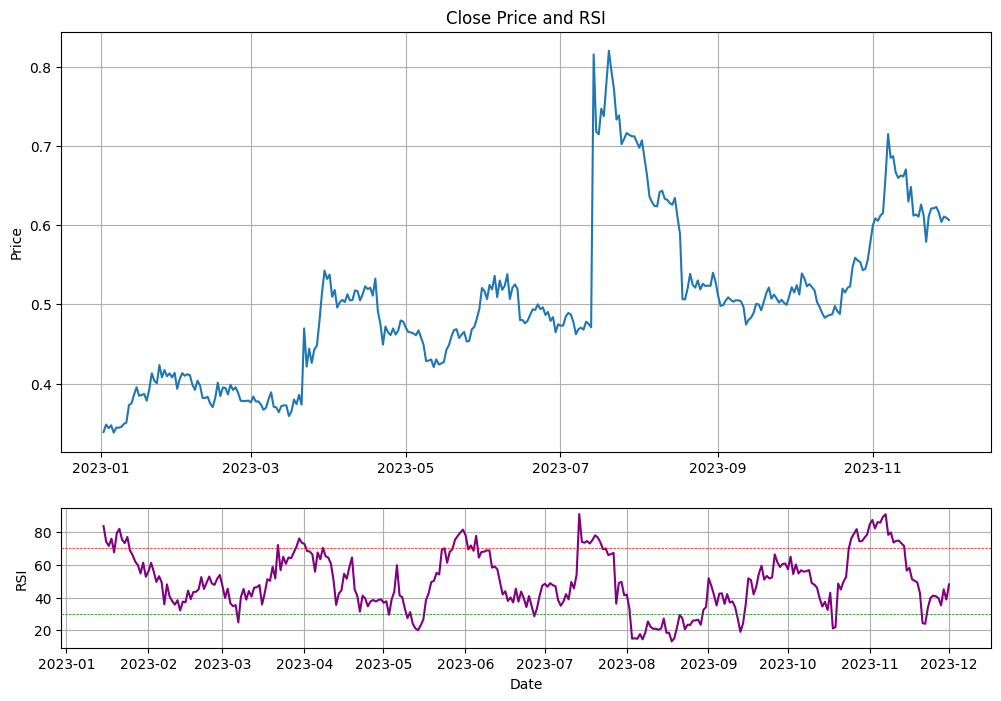

In [29]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

# Price Plot
ax1.plot(full_data['Close'], label='Close Price')
ax1.set_title('Close Price and RSI')
ax1.set_ylabel('Price')
ax1.grid(True)

# RSI Plot
ax2.plot(full_data['RSI'], label='RSI', color='purple')
ax2.axhline(70, color='r', linestyle='--', linewidth=0.5)
ax2.axhline(30, color='g', linestyle='--', linewidth=0.5)
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.grid(True)

# Show the plot
plt.show()

In [30]:
# Creating subplots
fig = go.Figure()

# Adding Close Price Trace
fig.add_trace(go.Scatter(x=full_data.index, y=full_data['Close'], mode='lines', name='Close Price'))

# Adding RSI Trace
fig.add_trace(go.Scatter(x=full_data.index, y=full_data['RSI'], mode='lines', name='RSI', yaxis='y2'))

# Update layout for a dual-axis plot
fig.update_layout(
    title='Close Price and RSI Chart',
    xaxis=dict(domain=[0.1, 0.9]),
    yaxis=dict(title='Close Price'),
    yaxis2=dict(title='RSI', overlaying='y', side='right', range=[0, 100]),
    legend=dict(orientation='h', y=1, x=0, yanchor='bottom', xanchor='left'),
    margin=dict(l=50, r=50, b=50, t=50, pad=4),
)

# Add horizontal lines for RSI
fig.add_hline(y=70, line_dash="dash", line_color="red", annotation_text="Overbought", annotation_position="bottom right")
fig.add_hline(y=30, line_dash="dash", line_color="green", annotation_text="Oversold", annotation_position="bottom right")

# Enhancing the look with annotations and custom hover info
fig.add_trace(go.Scatter(
    x=[full_data.index[50], full_data.index[80]],
    y=[full_data['RSI'][50], full_data['RSI'][80]],
    mode="markers+text",
    name="Annotations",
    text=["RSI Peak", "RSI Trough"],
    textposition="top center"
))

# Customizing the hover information
fig.update_traces(hoverinfo='all', hovertemplate="Date: %{x}<br>Value: %{y}")

# Show the plot
fig.show()


Leave the NaN Values: This is the most straightforward approach. Simply leave the NaN values as they are.
When plotting or analyzing the data, ensure that your code or tools can handle these NaN values appropriately.

## Exploratory analysis

### Volume by Days of the Month and highest closing price

In [46]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming 'Close_time' is the index of full_data and it's in datetime format
# Extracting the day from the index
full_data['Day'] = full_data.index.day

# Group by 'Day' and calculate the average volume and highest closing price
average_volume_by_day = full_data.groupby('Day')['Volume'].mean()
highest_close_by_day = full_data.groupby('Day')['Close'].max()

# Calculate the overall average volume for comparison
overall_average_volume = full_data['Volume'].mean()

# Create a subplot with 1 row and 2 columns
# The first column will have the graph and the second column will have the table
fig = make_subplots(rows=1, cols=2, column_widths=[0.7, 0.3], 
                    specs=[[{"type": "xy"}, {"type": "table"}]])

# Add the bar chart for average volume to the first column
fig.add_trace(go.Bar(x=average_volume_by_day.index, y=average_volume_by_day, 
                     name='Average Volume'), row=1, col=1)

# Add the scatter plot for the highest closing price to the first column
fig.add_trace(go.Scatter(x=highest_close_by_day.index, y=highest_close_by_day,
                         mode='markers+lines', name='Highest Close Price', 
                         marker=dict(color='orange')), row=1, col=1)

# Adding a line for the overall average volume in the first column
fig.add_hline(y=overall_average_volume, line=dict(color='red', width=2), row=1, col=1)

# Annotations for the overall average volume in the first column
fig.add_annotation(x=max(average_volume_by_day.index), y=overall_average_volume, 
                   text=f'Average: {overall_average_volume:.2f}', 
                   showarrow=False, yshift=10, row=1, col=1)

# Add the table to the second column
fig.add_trace(go.Table(
    header=dict(values=['Day', 'Average Volume', 'Highest Close Price'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[average_volume_by_day.index, 
                       average_volume_by_day.round(2), 
                       highest_close_by_day.round(2)],
               fill_color='lavender',
               align='left')), row=1, col=2)

# Update layout for a more modern look and to accommodate the highest close price trace
fig.update_layout(
    title='Average Volume and Highest Closing Price by Day of Month with Data Table',
    showlegend=True,
    plot_bgcolor='white'
)

# Update xaxis and yaxis properties for the first column
fig.update_xaxes(title_text='Day of Month', row=1, col=1)
fig.update_yaxes(title_text='Average Volume', row=1, col=1)

fig.show()


### Trends

In [33]:
full_data["Quote_asset_volume"] = full_data["Quote_asset_volume"].astype(float)
full_data["Taker_buy_quote_asset_vol"] = full_data["Taker_buy_quote_asset_vol"].astype(float)


In [40]:
def update_plot(column):
    fig = px.line(full_data, x=full_data.index, y=column, labels={'x': 'Time', 'y': column},
                  title=f'Trend of {column}')
    fig.update_layout(
        autosize=True,
        margin=dict(l=40, r=40, t=40, b=40),
        showlegend=True
    )
    fig.show()


# Dropdown for column selection
column_dropdown = widgets.Dropdown(
    options=[col for col in full_data.columns if col != 'Close_time'],  # Excluding 'Open_time' from the options
    description='Column:',
    disabled=False,
)

# Interactive widget
widgets.interactive(update_plot, column=column_dropdown)


interactive(children=(Dropdown(description='Column:', options=('Open_time', 'Open', 'High', 'Low', 'Close', 'V…

### Correlation between Volume and Quote Asset Volume

In [38]:
# Calculate correlation and p-value
correlation, p_value = pearsonr(full_data['Volume'], full_data['Quote_asset_volume'])

print("Correlation:", correlation)
print("P-value:", p_value)
# correlation not statistically significant

Correlation: 0.9391696845345584
P-value: 3.7694899362211613e-156


## Prediction

### Determine sesonality

In [ ]:
decomposition = seasonal_decompose(full_data["Close"], model='additive', period=7)  # period depends on data frequency
decomposition.plot()


### Determining p, d, q

In [ ]:
st=full_data["Volume"]
statio= adfuller(st)

import pandas as pd

# Assuming 'statio' is the result from the adfuller test
adf_statistic = statio[0]
p_value = statio[1]
critical_values = statio[4]

# Creating a dictionary for DataFrame construction
adf_results = {
    'Metric': ['ADF Statistic', 'p-value'],
    'Value': [adf_statistic, p_value]
}

# Adding critical values
for key, value in critical_values.items():
    adf_results['Metric'].append(f'Critical Value ({key})')
    adf_results['Value'].append(value)

# Creating DataFrame
adf_results_df = pd.DataFrame(adf_results)

# Displaying the DataFrame
adf_results_df

# my data can be considered stationary for autocorrelation (value d in arima model, in this case 0)

In [ ]:
st=full_data["Close"]
statio= adfuller(st)

import pandas as pd

# Assuming 'statio' is the result from the adfuller test
adf_statistic = statio[0]
p_value = statio[1]
critical_values = statio[4]

# Creating a dictionary for DataFrame construction
adf_results = {
    'Metric': ['ADF Statistic', 'p-value'],
    'Value': [adf_statistic, p_value]
}

# Adding critical values
for key, value in critical_values.items():
    adf_results['Metric'].append(f'Critical Value ({key})')
    adf_results['Value'].append(value)

# Creating DataFrame
adf_results_df = pd.DataFrame(adf_results)

# Displaying the DataFrame
adf_results_df

# my data can be considered stationary for autocorrelation (value d in arima model, in this case not  0)

In [ ]:
# Plot PACF: To identify parameter p
plot_pacf(full_data["Close"], lags=40)  # Adjust 'lags' as needed
plt.show()

# Plot ACF: To identify parameter q
plot_acf(full_data["Close"], lags=40)  # Adjust 'lags' as needed
plt.show()


The Partial Autocorrelation Function (PACF) plot you've provided shows the correlation of the series with its own lagged values, adjusted for the values of the time series at all shorter lags. In an ARIMA model, the 'p' parameter can often be estimated by the number of lags after which the PACF cuts off (i.e., the PACF becomes insignificant beyond a certain lag).

In the PACF plot you've uploaded, it appears that there is a significant spike at lag 1 (the first blue bar), after which the PACF values fall within the confidence interval (the blue shaded area represents the confidence interval, typically at 95%). This suggests that an AR(1) model may be appropriate, so you might start with `p = 1`.

It's important to consider that this is a heuristic approach and that the true underlying process may be more complex. Therefore, it is common to test a few different values of 'p' around the one suggested by the PACF plot to ensure the best model fit. You should also evaluate the model using criteria such as the Akaike Information Criterion (AIC) to compare the goodness of fit for different models.

The Autocorrelation Function (ACF) plot provides insight into the 'q' parameter for an ARIMA model, which represents the order of the Moving Average (MA) component.

In the ACF plot you've provided, we're looking for the point at which the autocorrelations become insignificant (i.e., fall within the confidence interval represented by the shaded area). In your plot, the autocorrelations gradually decrease but remain above the confidence interval for many lags. This might suggest a higher order of MA component, but it's not clear-cut.

Typically, you'd look for the lag at which the ACF cuts off (drops to zero or within the confidence interval) for the first time to determine 'q'. However, since the ACF values slowly decay and do not cut off sharply, this could indicate a more complex process, or it might suggest that the data requires a different form of differencing or transformation.

For a more decisive determination of 'q', you might look for the first lag where the ACF is within the confidence interval and stays within it for subsequent lags. If this decay pattern continues without a clear cut-off point, you may want to revisit the stationarity of your data, or consider a different modeling approach such as ARIMA with seasonal differencing or a more complex model like SARIMA if seasonality is present.

Given the ambiguity in the ACF plot, you might start with a lower 'q' value (like 1 or 2) and use model selection criteria (like AIC or BIC) to find the best model. It's also possible that an ARIMA model may not be the best choice if the data has this form of decay in the ACF without a clear cut-off, and exploring alternative models or additional differencing might be warranted.







###  Split data

In [ ]:
# Splitting the data into train and test sets
train_size = int(len(full_data["Close"]) * 0.7)
train, test = full_data["Close"][0:train_size], full_data["Close"][train_size:len(full_data)]


### Choosing a model 

Model selection criteria are statistical methods used to choose between different statistical models. In time series analysis and other modeling tasks, these criteria help to balance goodness-of-fit against model complexity (to avoid overfitting). The most commonly used model selection criteria include:

1. **Akaike Information Criterion (AIC)**:
   - AIC = 2k - 2ln(L),
   - where k is the number of parameters in the model, and L is the likelihood of the model.
   - AIC rewards goodness of fit but also includes a penalty that increases with the number of estimated parameters.
   - The model with the lowest AIC is generally preferred.

2. **Bayesian Information Criterion (BIC)**:
   - BIC = ln(n)k - 2ln(L),
   - where n is the number of observations, k is the number of parameters, and L is the likelihood of the model.
   - BIC includes a penalty term for the number of parameters in the model that is larger than that of the AIC.
   - The model with the lowest BIC is generally preferred, especially when the sample size is large.

3. **Hannan-Quinn Information Criterion (HQIC)**:
   - HQIC = 2k ln(ln(n)) - 2ln(L),
   - It's similar to AIC and BIC but has a different penalty term, and it's not as widely used.

The AIC and BIC are both designed to prevent overfitting:

- **Overfitting** occurs when a model becomes too complex and starts to capture the random noise in the data rather than the underlying process.
- **Underfitting** occurs when a model is too simple to capture the underlying process in the data.

Both AIC and BIC try to select the model that most adequately fits the data without introducing unnecessary complexity. However, BIC tends to penalize complex models more heavily than AIC, particularly when the sample size is large. This means that BIC may tend to choose simpler models than AIC.

In practice, you should compare models using both AIC and BIC and consider the context of the problem and the sample size when making your decision. It is also essential to validate the chosen model's predictive performance using hold-out data or cross-validation.

In [ ]:
# Fit an ARIMA model (you should determine the order (p, d, q) beforehand)
model =ARIMA(full_data["Close"], order=(1, 1, 1))  # Replace p, d, q with appropriate values
model_fit = model.fit()

# Get the AIC
aic = model_fit.aic
print(f'The AIC of the model is: {aic}')


In [ ]:
# Fit an ARIMA model (you should determine the order (p, d, q) beforehand)
model =ARIMA(full_data["Close"], order=(1, 2, 2))  # Replace p, d, q with appropriate values
model_fit = model.fit()

# Get the AIC
aic = model_fit.aic
print(f'The AIC of the model is: {aic}')


In [ ]:
full_data.set_index('Close_time', inplace=True)

# Define SARIMA model parameters
p = 1  # Non-seasonal autoregressive order
d = 1  # Non-seasonal differencing order
q = 1  # Non-seasonal moving average order
P = 1  # Seasonal autoregressive order
D = 1  # Seasonal differencing order
Q = 1  # Seasonal moving average order
s = 12  # Seasonal period (e.g., 12 for monthly data)

# Create and fit the SARIMA model
sarima_model = sm.tsa.SARIMAX(
    full_data["Close"],
    order=(p, d, q),
    seasonal_order=(P, D, Q, s),
    enforce_stationarity=False,  # Allow non-stationary components
    enforce_invertibility=False  # Allow non-invertible components
)
sarima_results = sarima_model.fit()

# Get the AIC
aic = model_fit.aic
print(f'The AIC of the model is: {aic}')

# Print model summary
print(sarima_results.summary())


Determining the appropriate parameters for a SARIMA (Seasonal Autoregressive Integrated Moving Average) model can be a critical and sometimes iterative process. The goal is to find the model parameters that provide the best fit to your time series data. Here are the general steps to determine SARIMA parameters:

Visualize the Data:
Start by plotting your time series data to get a sense of its characteristics. Look for trends, seasonality, and any other patterns that may be present.

Identify Seasonality:
Determine the seasonal period (s) of your data. For example, if you're working with monthly data, the seasonal period is typically 12 for yearly seasonality.

Stationarity Check:
Ensure that your time series is stationary. Stationarity means that the statistical properties of the time series, such as mean and variance, do not change over time. You can use statistical tests like the Augmented Dickey-Fuller (ADF) test to check for stationarity. If the data is not stationary, you may need to apply differencing (d) to make it stationary.

Autocorrelation and Partial Autocorrelation Analysis:
Examine the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots of the differenced data. These plots can help you identify potential values for the non-seasonal autoregressive (p) and moving average (q) orders.

ACF plot: Significant spikes at lags indicate the potential value of q.
PACF plot: Significant spikes at lags indicate the potential value of p.
Seasonal Autocorrelation and Partial Autocorrelation Analysis:
Similarly, analyze the ACF and PACF plots for the seasonal differences of the data. These plots can help you determine the values of the seasonal autoregressive (P) and moving average (Q) orders.

Seasonal ACF plot: Significant spikes at seasonal lags indicate the potential value of Q.
Seasonal PACF plot: Significant spikes at seasonal lags indicate the potential value of P.
Initial Parameter Selection:
Based on the visual analysis and autocorrelation plots, you can make initial parameter selections for p, d, q, P, D, and Q. These selections serve as starting points for model estimation.

Model Estimation and Evaluation:
Use the initial parameter values to estimate a SARIMA model. Fit the model to your data and evaluate its goodness of fit using metrics like AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion). Lower AIC and BIC values indicate a better-fitting model.

Iterate and Refine:
If the initial model does not fit your data well or if the diagnostic plots show issues with the residuals, you may need to iterate and adjust the parameter values. Try different combinations of parameter values and continue to estimate and evaluate the models until you find the best-fitting SARIMA model.

Validation:
After selecting the final SARIMA model, perform out-of-sample validation to assess its forecasting accuracy. You can split your data into training and testing sets and compare the model's forecasts to the actual values in the testing set.

Finalize the Model:
Once you are satisfied with the SARIMA model's performance, finalize the model with the chosen parameter values and use it for forecasting future data points.

Keep in mind that determining SARIMA parameters can be both an art and a science, and it may require some trial and error. Additionally, domain knowledge about the data and the underlying processes can be helpful in guiding the parameter selection process.





